# 다중 분류 - 아이리스 품종 분류

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# X data는 정규화
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(iris.data)
X_scaled.shape

(150, 4)

In [4]:
# Y data는 One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target)
Y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
Y_onehot.shape

(150, 3)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_onehot, stratify=Y_onehot, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

- 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# 모델 정의
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),  # Hidden Layer
    Dense(3, activation='softmax')              # Output Layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',        # 다중 분류시 오차 함수
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0
)

In [11]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.2548 - accuracy: 0.9333


[0.2547621428966522, 0.9333333373069763]

- 모델 저장/로드

In [12]:
!mkdir model

In [15]:
model.save('model/iris.h5')

In [19]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris.h5')

In [20]:
my_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.2548 - accuracy: 0.9333


[0.2547621428966522, 0.9333333373069763]

- 학습과정 시각화

In [21]:
import matplotlib.pyplot as plt

In [22]:
y_acc =  history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

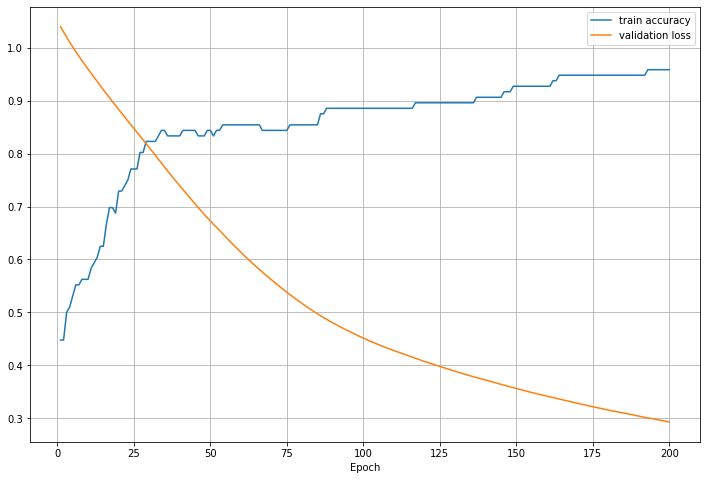

In [23]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

- Epoch 횟수를 더 늘려서 학습을 해보자

In [37]:
model2 = Sequential([
    Dense(16, input_dim=4, activation='relu'),  # Hidden Layer
    Dense(3, activation='softmax')              # Output Layer
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history2 = model2.fit(
    X_train, Y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=0
)

In [40]:
model2.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.1344 - accuracy: 0.9000


[0.13444873690605164, 0.8999999761581421]

In [41]:
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

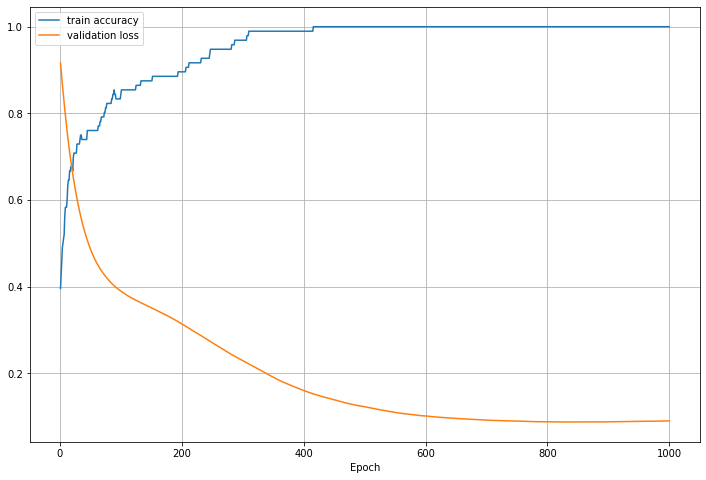

In [42]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [36]:
del model2